In [3]:
from gf_utils.stc_data import get_stc_data
import pandas as pd
import numpy as np
stc = get_stc_data(stc_dir='../data/ch/stc',subset='enemy_standard_attribute')
std_attr = stc['enemy_standard_attribute']
df_attr = pd.DataFrame.from_records(std_attr)

In [4]:
standard_level = df_attr.iloc[99]
df_rel_attr = pd.DataFrame()
for k in standard_level.keys():
    if k=='level':
        df_rel_attr[k] = df_attr[k]%10000
        df_rel_attr['type'] = df_attr[k]//10000
    else:
        df_rel_attr[k] = df_attr[k]/standard_level[k]

In [13]:
groups = [df_rel_attr.groupby('type').get_group(i) for i in range(7)]

In [86]:
print(standard_level.keys())

Index(['level', 'maxlife', 'pow', 'dodge', 'hit', 'armor_piercing', 'armor',
       'shield', 'def', 'def_break'],
      dtype='object')


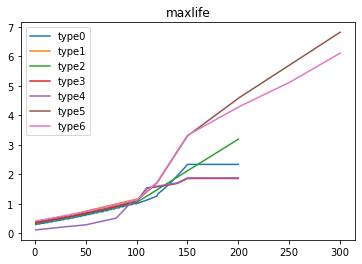

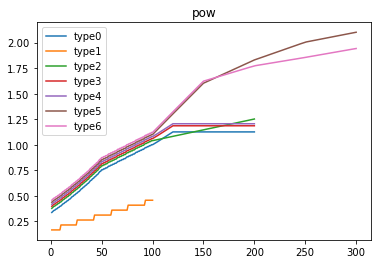

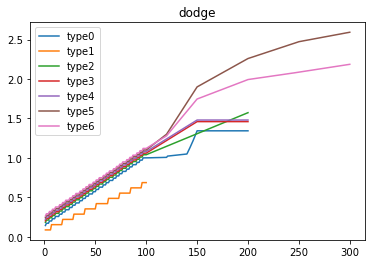

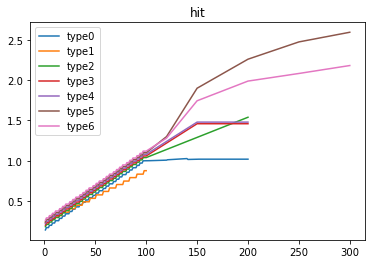

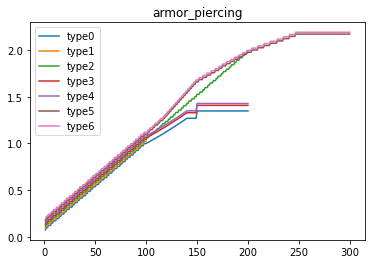

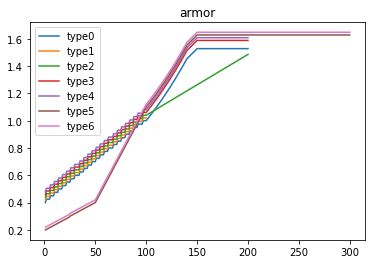

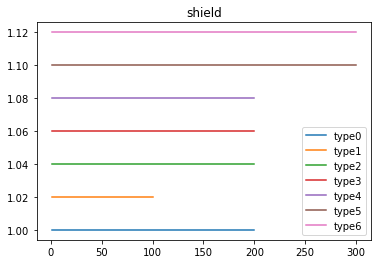

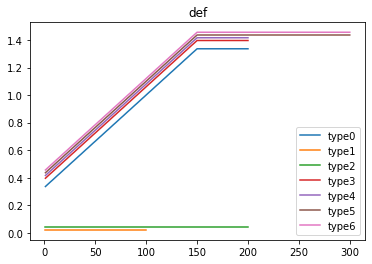

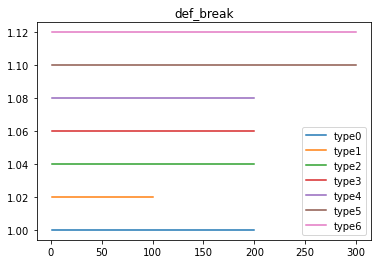

In [82]:
from matplotlib import pyplot as plt
import matplotlib.transforms as mtrans

for k in standard_level.keys():
    if k=='level':
        continue
    for i,g in enumerate(groups):
        plt.plot(g['level'],g[k]+0.02*i,label=f"type{i}")
    plt.legend()
    plt.title(k)
    plt.show()
        

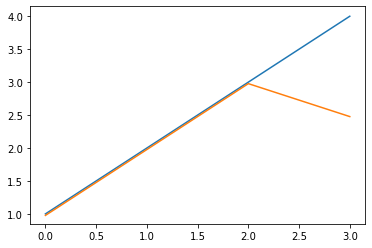

In [45]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

fig, ax = plt.subplots()
plt.plot([1,2,3,4], label="up")

tr = mtrans.offset_copy(ax.transData, fig=fig, x=0.0, y=-1.5, units='points')
plt.plot([1,2,3,2.5], label="down", transform=tr)

plt.show()